<a href="https://colab.research.google.com/github/dssalim/Topicos_SI_IA/blob/main/Atividade_SI_Estatistica_LLMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução


Carregando bibliotecas

In [32]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


Fonte de dados: https://dadosabertos.ibama.gov.br/dataset/volumes-explorados-if-100/resource/ac345e77-863b-472c-a06a-4f171263bc70

In [33]:
#Carregando dados

dados = pd.read_csv(
    'VolumeExpIF100_ano_2025.csv',
    sep=';',
    encoding='latin-1',
    decimal=',',
    engine='python',
    on_bad_lines='skip'
)

In [34]:
#Checando os dados carregados

dados.head()




,NRO_REGISTRO,NRO_AUTORIZACAO,DATA_DE_EMISSAO,DATA_DE_VALIDADE,UF,MUNICIPIO,NOME_DETENTOR,CPF_CNPJ_DETENTOR,ATIVIDADE,PRODUTO,...,LATITUDE_ARVORE,LONGITUDE_ARVORE,NOME_CIENTIFICO,NOME_POPULAR,VOLUME_AUTORIZADO,VOLUME_EXPLORADO,DATA_DA_EXPLORACAO,SITUACAO,DATA_DA_SITUACAO,ULTIMA_ATUALIZACAO_RELATORIO
0,22320169,20232202562893,2025-01-30,2026-01-30,CE,NOVA RUSSAS,FAGBN,641.***.***-**,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,2262.0500,2260.00,2025-07-12,AutorizaÃ§Ã£o Emitida,2025-01-30,2025-11-30 11:22
1,23137133,20312202574721,2025-06-12,2028-06-12,MG,AIURUOCA,FERNANDO CARDOSO SANTOS SILVA,45.670.499/0001-82,POA (Outros Biomas) Pleno,Lenha(mÂ³),...,NaN,NaN,Diversos,Diversos,86.4200,86.42,2025-08-08,AutorizaÃ§Ã£o Emitida,2025-06-12,2025-11-30 11:22
2,22320316,20232202572520,2025-07-22,2026-07-22,CE,CHORO,SMCA,071.***.***-**,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,5449.9916,550.00,2025-11-26,AutorizaÃ§Ã£o Emitida,2025-07-22,2025-11-30 11:22
3,21119354,20112202561204,2025-06-30,2026-06-30,RO,PIMENTA BUENO,MADLIMA LTDA,39.978.393/0001-48,POA (AmazÃ´nia Legal) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,494.2759,480.00,2025-09-22,AutorizaÃ§Ã£o Emitida,2025-06-30,2025-11-30 11:22
4,22619077,20262202559203,2025-07-02,2026-07-02,PE,TERRA NOVA,ECF,337.***.***-**,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,4781.0000,2440.00,2025-11-29,AutorizaÃ§Ã£o Emitida,2025-07-02,2025-11-30 11:22


In [35]:
#Criando uma seleção e cópia dos dados apenas para o Estado do Pará

dados_pa = dados[dados['UF']=='PA'].copy()

In [36]:
#Checando os Nomes populares presentes no dataframe
dados_pa['NOME_POPULAR'].unique()

array(['ItaÃºba', 'Fava-tamboril', 'Guajara bolacha', 'Cumaru-vermelho',
       'Sucupira-pele-de-sapo', 'GuajarÃ¡', 'Uxirana', 'MaÃ§aranduba',
       'Garapeira', 'Garapa', 'Maparajuba', 'Jarana', 'Tauari-branco',
       'PequiÃ¡', 'Louro-tamaquarÃ©', 'Sucupira', 'Sucupira-amarela',
       'Sapucaia', 'Castanha-sapucaia', 'Mandioqueiro', 'Mandioqueira',
       'Mandioqueira-escamosa', 'Fava-orelha-de-macaco',
       'Orelha-de-macaco', 'Fava-amargosa', 'AmapÃ¡-doce',
       'Angelim-pedra', 'JutaÃ\xad-mirim', 'Muirapiranga',
       'Angelim-amargoso', 'IpÃª-amarelo', 'Andiroba', 'Timborana',
       'Quarubatinga', 'Roxinho', 'Cedroarana', 'Quaruba', 'Quarubarana',
       'Cedrinho', 'Faveira-de-arara', 'Oiticica', 'Guariuba',
       'GuariÃºba', 'Abiurana', 'GoiabÃ£o', 'Muiracatiara', 'Cumaru',
       'Cumaru-amarelo', 'CupiÃºba', 'Fava-bolota', 'Tauari-vermelho',
       'Tauari', 'Cedro', 'Cedro-vermelho', 'JatobÃ¡', 'Tatajuba',
       'FreijÃ³', 'FreijÃ³-cinza', 'Uxi', 'Louro-faia',

In [37]:
#checando produtos
dados_pa['PRODUTO'].unique()

array(['Tora(mÂ³)', 'Toretes(mÂ³)'], dtype=object)

In [38]:
#Carregando dados referentes ao nome popular Ipê

ipe_amarelo = pd.DataFrame(dados_pa[dados_pa['NOME_POPULAR']=='IpÃª-amarelo'].copy())
ipe_roxo = pd.DataFrame(dados_pa[dados_pa['NOME_POPULAR']=='IpÃª-roxo'].copy())

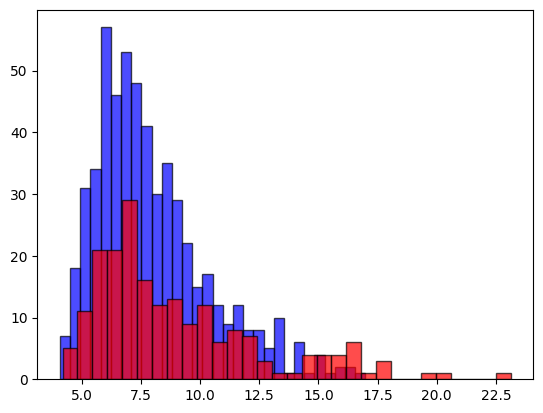

In [39]:
#Plotando Histogramas referentes ao Volume autorizado da Espécie

plt.hist(ipe_amarelo['VOLUME_AUTORIZADO'], bins=30, label='True', color='blue', edgecolor='black', alpha = 0.7)
plt.hist(ipe_roxo['VOLUME_AUTORIZADO'], bins=30, label='True', color='red', edgecolor='black', alpha = 0.7)
plt.show()

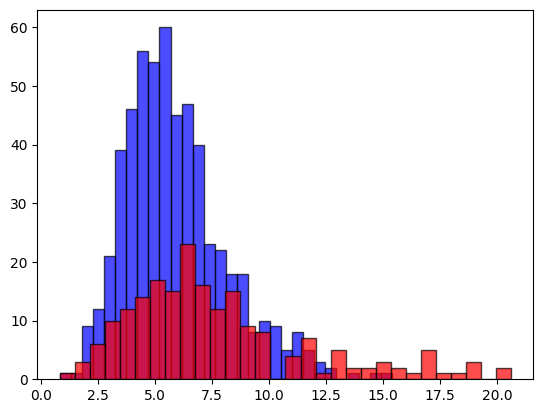

In [40]:
#Plotando Histogramas referentes ao Volume Explorado da Espécie

plt.hist(ipe_amarelo['VOLUME_EXPLORADO'], bins=30, label='True', color='blue', edgecolor='black', alpha = 0.7)
plt.hist(ipe_roxo['VOLUME_EXPLORADO'], bins=30, label='True', color='red', edgecolor='black', alpha = 0.7)
plt.show()

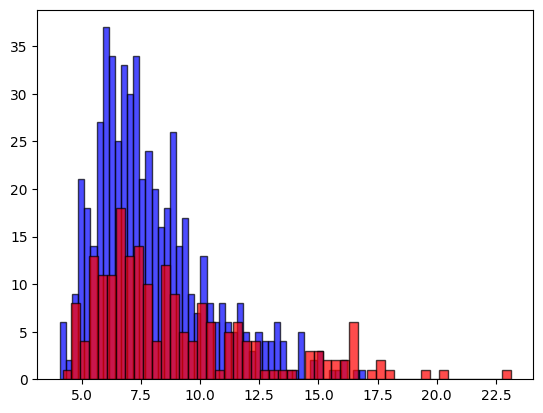

In [41]:
#Plotando Histogramas referentes ao Volume autorizado da Espécie com 50 bins

plt.hist(ipe_amarelo['VOLUME_AUTORIZADO'], bins=50, label='True', color='blue', edgecolor='black', alpha = 0.7)
plt.hist(ipe_roxo['VOLUME_AUTORIZADO'], bins=50, label='True', color='red', edgecolor='black', alpha = 0.7)
plt.show()

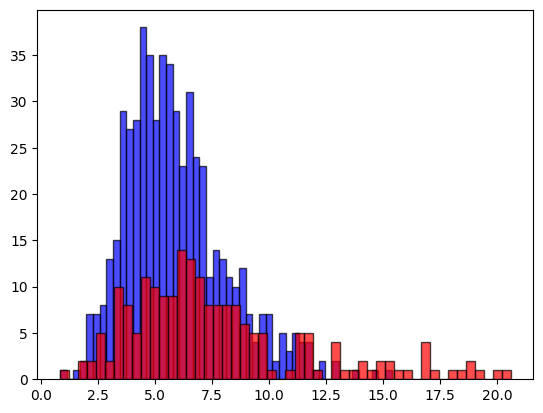

In [42]:
#Plotando Histogramas referentes ao Volume Explorado da Espécie com 50 bins

plt.hist(ipe_amarelo['VOLUME_EXPLORADO'], bins=50, label='True', color='blue', edgecolor='black', alpha = 0.7)
plt.hist(ipe_roxo['VOLUME_EXPLORADO'], bins=50, label='True', color='red', edgecolor='black', alpha = 0.7)
plt.show()

# Atividade 2

Calcular o Z-score

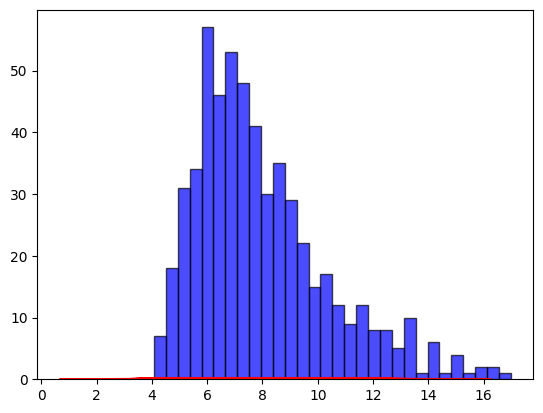

In [43]:
data_ipe_amarelo = ipe_amarelo['VOLUME_AUTORIZADO'].copy()
data_ipe_roxo = ipe_roxo['VOLUME_AUTORIZADO'].copy()

data_ipe_amarelo.max()
mu_ipe_amarelo, sigma_ipe_amarelo = stats.norm.fit(data_ipe_amarelo)

artificial_ipe_amarelo = np.random.normal(mu_ipe_amarelo, sigma_ipe_amarelo,1000)

pdf_ipe_amarelo = stats.norm.pdf(artificial_ipe_amarelo, mu_ipe_amarelo, sigma_ipe_amarelo)
plt.hist(data_ipe_amarelo, bins=30, label='True', color='blue', edgecolor='black', alpha = 0.7)
plt.plot(artificial_ipe_amarelo,pdf_ipe_amarelo,'r-', label =f'Fit: u:{mu_ipe_amarelo: .2f}, sigma{sigma_ipe_amarelo: .2f}')
plt.show()

In [44]:
artificial_ipe_amarelo.mean()

np.float64(7.9426219781073435)

# Atividade 3


Equação


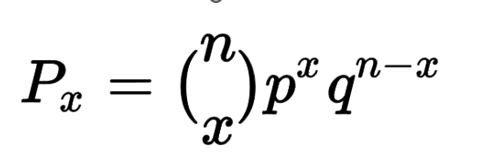

In [60]:
def fatorial(x):
  if x == 0:
    return 1
  else:
    return x * fatorial(x-1)
def combinacao (n, x):
  return fatorial(n) / (fatorial(x) * fatorial(n-x))
def binomial (n, x, p):
  return combinacao(n, x) * (p**x) * ((1-p)**(n-x))

In [79]:
binomial(50,48,0.8)

0.001092736514728003

Relizando o Calculo e o Gráfico utilizando o numpy

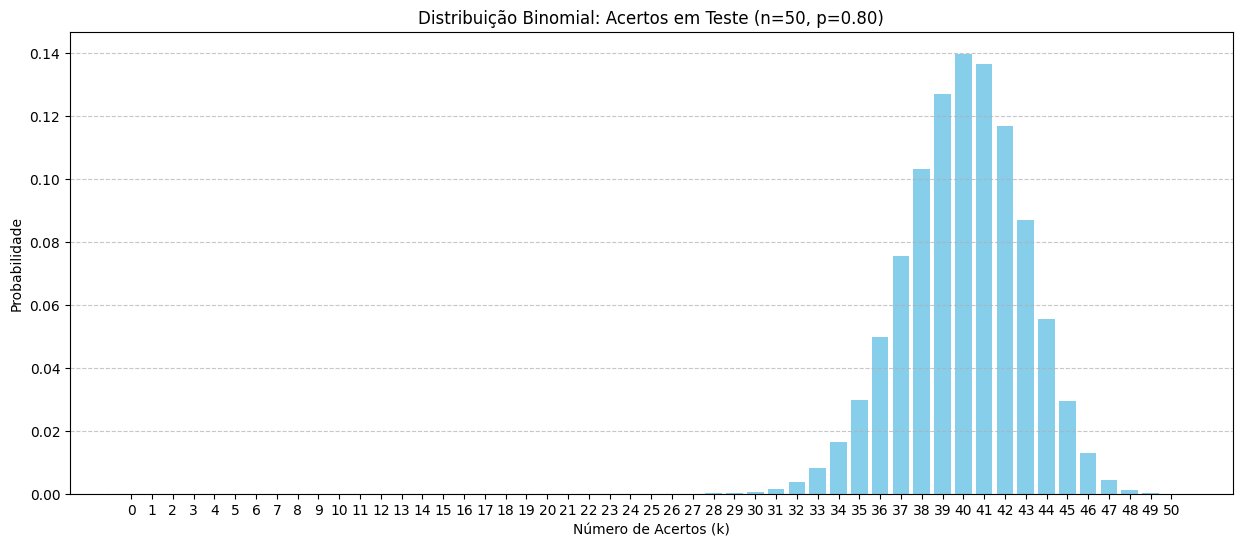

In [80]:
n = 50
k = np.arange(0, n+1, 1)
s = 0.80


probabilidades = stats.binom.pmf(k, n, s)


plt.figure(figsize=(15, 6))
plt.bar(k, probabilidades, color='skyblue')
plt.title('Distribuição Binomial: Acertos em Teste (n=50, p=0.80)')
plt.xlabel('Número de Acertos (k)')
plt.ylabel('Probabilidade')
plt.xticks(k)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Part 2